<a href="https://colab.research.google.com/github/SRARNAB7/HDS_5230_07_Arnab/blob/main/Final_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME- ARNAB SUTAR

COURSE - High Performance Computing - 07 (Spring 2025)

ASSIGNMENT - Assignment Week05

Uisng pip installing Dask DIstributed

In [74]:
!pip install dask distributed

By setting up a Dask distributed cluster before computation, I am enabling parallel execution, making it faster and scalable for large-scale data processing.

In [75]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=4, threads_per_worker=3)
client = Client(cluster)
print(client)

/usr/local/lib/python3.11/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33473 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41399
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:33473/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36919'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45931'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39015'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36913'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34437 name: 3
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34437
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45580
INFO:distributed.sch

<Client: 'tcp://127.0.0.1:41399' processes=4 threads=12, memory=12.67 GiB>


Q1, Q2) Reading the timeseries csv file and then loading them in a dask dataframe for parallelising the code. Followed by that the country is filtered for the United States in another dataframe.

This Python code defines two functions using Dask Delayed, optimizing operations for large datasets. The first function, load_csv_data(filepath), loads a large CSV file into a Dask DataFrame with predefined data types for efficient memory usage. The second function, filter_us_data(df), filters the dataset to include only records from the United States, ensuring that entries without a state value are dropped. The query-based filtering (df.query(...)) enhances performance. Using Dask enables parallelized, out-of-core processing, making it suitable for handling large-scale COVID-19 or demographic datasets efficiently.

Installed the required packages to run the dask data frames, delays and compute


In [76]:
import dask.dataframe as dd
from dask import delayed, compute
import pandas as pd
import numpy as np

In [77]:
pip install dask graphviz

In [78]:
import graphviz

In [79]:
@delayed
def load_csv_data(filepath):
    """
    Loads a large CSV file into a Dask DataFrame.

    Parameters:
    filepath (str): Path to the CSV file.

    Returns:
    Dask DataFrame: The loaded dataset.
    """
    # Defining the expected dtypes since in dask we should do this to suggest the datatypes
    dtypes = {'name':str,'level':str,'city':object,'county':str,'state':str,'country':str,'population':np.float64,'lat':float,'long':float,'url':str,'aggregate':object,'tz':str,'cases':np.float64,'deaths':np.float64,'recovered':np.float64,'active':np.float64,'tested':np.float64,'hospitalized':np.float64,'hospitalized_current':np.float64,'discharged':np.float64,
    'icu':np.float64,'icu_current':np.float64,'growthFactor':np.float64,'date':object}

    # Loading CSV into Dask DataFrame
    return dd.read_csv(filepath, dtype=dtypes)


@delayed
def filter_us_data(df):
    """
    Filters the dataset to include only US records.

    Parameters:
    df (Dask DataFrame): The full dataset.

    Returns:
    Dask DataFrame: Filtered dataset containing only US records.
    """
    return df.query("country == 'United States'").dropna(subset=['state'])


 Both functions are decorated with @delayed, they return lazy objects, meaning computations are deferred until explicitly triggered using .compute(). This approach significantly improves efficiency when working with large-scale datasets.

In [80]:
#%%timeit
# Calling both functions using `delayed`
csv_path = "timeseries.csv"
df_dask_delayed = load_csv_data(csv_path)
df_us_delayed = filter_us_data(df_dask_delayed)


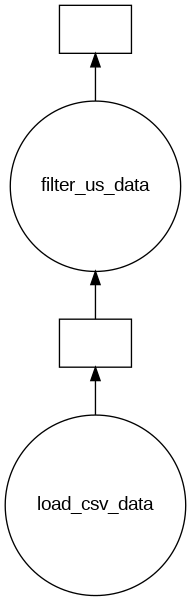

In [81]:
df_us_delayed.visualize(filename="task_graph", format="png")

Triggering to run the function using compute

In [82]:
#%%timeit
df_us = compute(df_us_delayed)[0]

22.5 ms ± 4.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



Using Dask Delayed and a distributed execution framework makes sense when handling large datasets with expensive computations. The parallelized execution speeds up loading, filtering, and computing results across multiple CPU cores or machines.

In [83]:
df_us.head()

INFO:distributed.core:Event loop was unresponsive in Nanny for 6.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 6.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

,name,level,city,county,state,country,population,lat,long,url,...,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
24958,"Washoe County, Nevada, United States",county,<NA>,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05
24959,"Washoe County, Nevada, United States",county,<NA>,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-06
24960,"Washoe County, Nevada, United States",county,<NA>,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-07
24961,"Washoe County, Nevada, United States",county,<NA>,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2020-03-08
24962,"Washoe County, Nevada, United States",county,<NA>,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-09


The code is to check the unique states present in the df_us when filtered with United States. The numbe of states is 55.

In [84]:
# Get unique states from 'state' column
unique_states = df_us['state'].unique()

# Compute unique values in parallel
unique_states_list = unique_states.compute()

# Print the result
print(unique_states_list)

0                           Nevada
1                         Virginia
2                       Washington
3                          Alabama
4                           Alaska
5                          Arizona
6                         Arkansas
7                       California
8                         Colorado
9                      Connecticut
10                        Delaware
11                         Florida
12                         Georgia
13                          Hawaii
14                           Idaho
15                        Illinois
16                         Indiana
17                            Iowa
18                          Kansas
19                        Kentucky
20                       Louisiana
21                           Maine
22                        Maryland
23                   Massachusetts
24                        Michigan
25                       Minnesota
26                     Mississippi
27                        Missouri
28                  

**2) During the time period 2020-Jan-01 to 2021-Feb-28, rank states in terms of their per-capita mortality**

The code below is designed to compute the per-capita mortality ranking of U.S. states using Dask Delayed, a framework for parallel and efficient computation on large datasets. It begins by preprocessing the dataset, converting the "date" column to a datetime format and filtering the records to include only data within a specified date range. Once the relevant data is selected, it computes the total number of deaths per state and the average population over the given period. These calculations are performed in parallel to optimize efficiency.

After obtaining the total deaths and average population, the code calculates the per-capita mortality by dividing the number of deaths by the population. The result is then converted into a Dask DataFrame, where the states are sorted in descending order based on their mortality rate. This ranking process allows for easy identification of states with the highest per-capita mortality.

In [86]:
#%%timeit
@delayed
def convert_date_format(df):
    """Converts the 'date' column to datetime format."""
    df['date'] = dd.to_datetime(df['date'])
    return df

@delayed
def filter_date_range(df, start_date, end_date):
    """Filters the dataset to include only records within the specified time range."""
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

@delayed
def compute_total_deaths(df):
    """Computes the total number of deaths per state."""
    return df.groupby('state')['deaths'].sum()

@delayed
def compute_avg_population(df):
    """Computes the average population per state over the given period."""
    return df.groupby('state')['population'].mean()

@delayed
def compute_per_capita_mortality_ratio(total_deaths, avg_population):
    """Computes per-capita mortality."""
    return total_deaths / avg_population

def compute_per_capita_mortality(df_us, start_date="2020-01-01", end_date="2021-02-28", visualize=False):
    """
    Computes per-capita mortality ranking for US states using Dask.
    """

    # Convert Date Format
    df_us_delayed = convert_date_format(df_us)

    # Apply Date Filtering
    df_period_delayed = filter_date_range(df_us_delayed, start_date, end_date)

    # Compute Total Deaths & Average Population in Parallel
    total_deaths_delayed = compute_total_deaths(df_period_delayed)
    avg_population_delayed = compute_avg_population(df_period_delayed)

    # Compute per-capita mortality using `delayed`
    per_capita_mortality_delayed = compute_per_capita_mortality_ratio(total_deaths_delayed, avg_population_delayed)

    # Convert to DataFrame lazily
    per_capita_mortality_df_delayed = delayed(lambda x: x.to_frame(name="per_capita_mortality"))(per_capita_mortality_delayed)

    # Rank states lazily
    ranked_states_delayed = delayed(lambda df: df.sort_values(by="per_capita_mortality", ascending=False))(per_capita_mortality_df_delayed)

    return ranked_states_delayed  # Now it returns a delayed object, not a computed result
df_us = df_us.persist()  # This ensures no previous computations are retained

# Getting the delayed computation first
ranked_states_delayed = compute_per_capita_mortality(df_us)


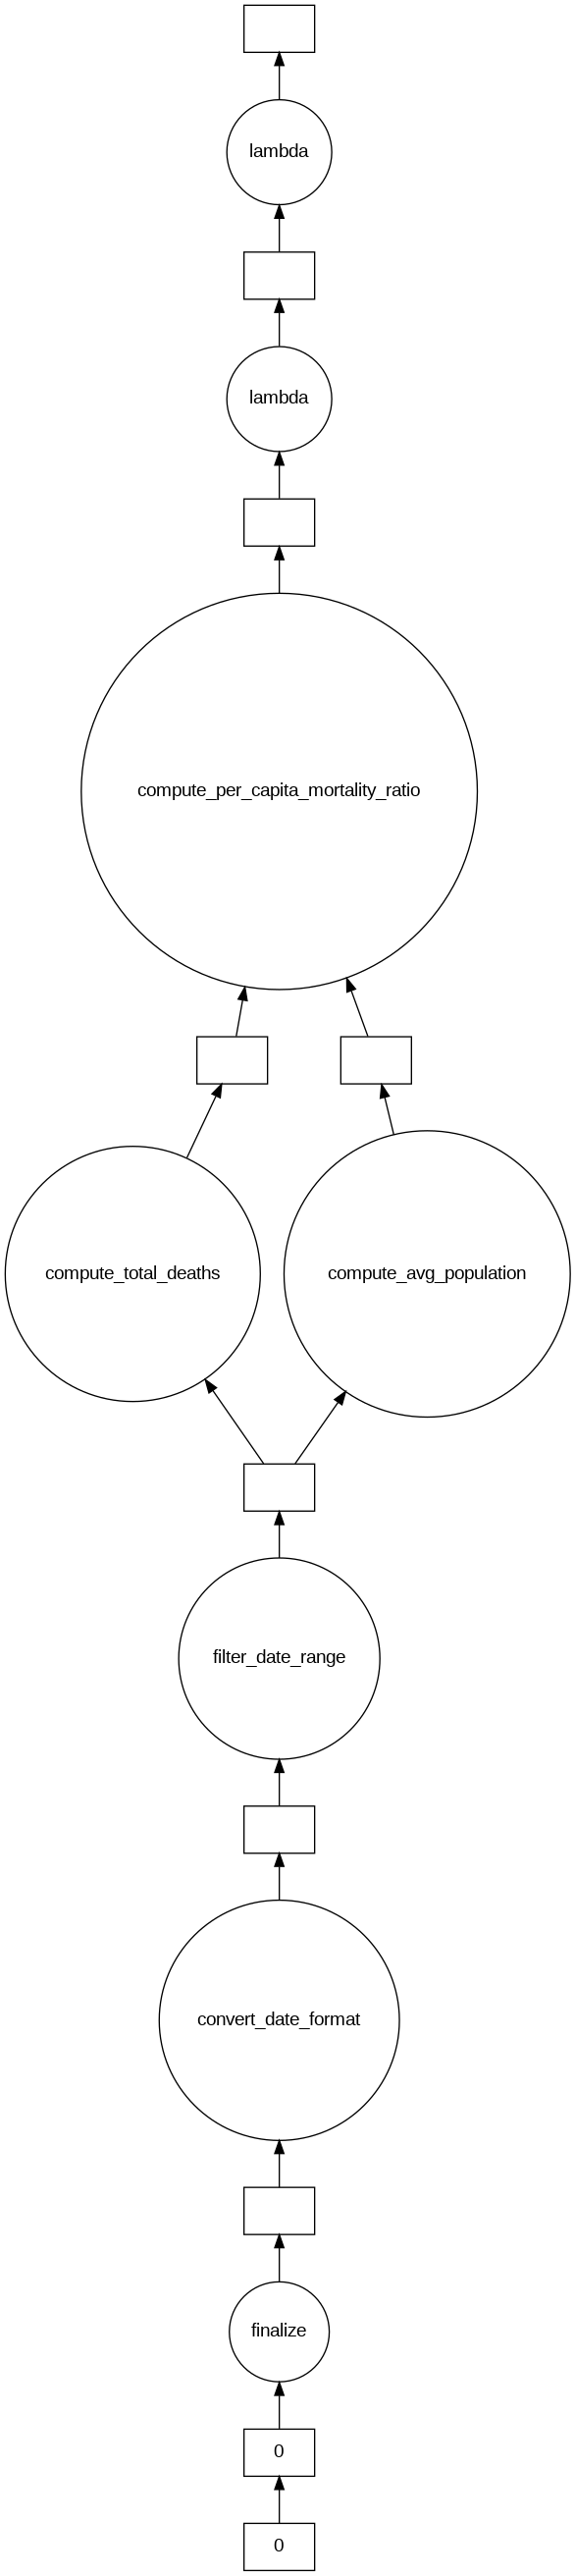

In [87]:
ranked_states_delayed.visualize()

Triggers the execution of all delayed computations in ranked_states_delayed. The time taken by it is also calculated using the magic %%timeit

In [91]:
#%%timeit
ranked_states = compute(ranked_states_delayed)[0]

1.48 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

The Rank of the states for the PER CAPITA MORTALITY is shown below-

In [92]:
print(ranked_states)

                              per_capita_mortality
state                                             
New York                                  6.395701
Michigan                                  3.204753
Louisiana                                 2.735288
Illinois                                  2.043863
New Jersey                                2.031200
Georgia                                   2.026085
Pennsylvania                              1.831572
Virginia                                  1.359063
Mississippi                               1.356705
Indiana                                   1.353423
Ohio                                      1.058943
Iowa                                      0.958771
Massachusetts                             0.904775
Colorado                                  0.894296
Minnesota                                 0.768853
Kentucky                                  0.751512
Texas                                     0.737643
Missouri                       

Parallelized execution makes sense if the dataset is large and involves expensive computations like filtering, grouping, and sorting. Since all these operations are performed so Parallelising them using dask delayed will be usefil.The use of Dask Distributed further improves performance by spreading computations across multiple workers. I have also installed distributed to reduce the computaion time.

**3) During the same time period, compute the case fatality rate (CFR) per month**

The code below computes the Case Fatality Rate (CFR) per state per month using Dask Delayed for parallelized, large-scale data processing. It first converts the "date" column to datetime format and filters records to the specified date range. The dataset is then enriched with a year-month column for monthly aggregation. It calculates total deaths and total cases per state per month concurrently, then computes CFR as (deaths / cases) * 100. The code ensures all months are represented and reshapes the data into a 55 states × 14 months matrix(since 55 states is present for United States in the Excel). Computation is deferred using Dask Delayed, improving efficiency for large datasets.

In [93]:
import dask.dataframe as dd
from dask import delayed, compute
import pandas as pd

@delayed
def convert_date_format(df):
    """Converts the 'date' column to datetime format."""
    df['date'] = dd.to_datetime(df['date'])
    return df

@delayed
def filter_date_range(df, start_date, end_date):
    """Filters the dataset to include only records within the specified time range."""
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

@delayed
def extract_year_month(df):
    """Extracts Year-Month column for aggregation."""
    df['year_month'] = df['date'].dt.to_period('M')
    return df

@delayed
def compute_total_deaths(df):
    """Computes the total number of deaths per state per month."""
    return df.groupby(['state', 'year_month'])['deaths'].sum()

@delayed
def compute_total_cases(df):
    """Computes the total number of cases per state per month."""
    return df.groupby(['state', 'year_month'])['cases'].sum()

@delayed
def compute_cfr(total_deaths, total_cases):
    """Computes Case Fatality Rate (CFR) and handles zero cases."""
    return (total_deaths / total_cases) * 100

@delayed
def ensure_all_months(cfr_df, start_date, end_date):
    """Ensures that all 14 months are present in the final DataFrame."""
    all_months = pd.period_range(start=start_date, end=end_date, freq='M')
    full_index = pd.MultiIndex.from_product([cfr_df['state'].unique(), all_months], names=['state', 'year_month'])
    return cfr_df.set_index(['state', 'year_month']).reindex(full_index).fillna(0).reset_index()

@delayed
def pivot_cfr_matrix(cfr_df):
    """Pivots the CFR DataFrame into a matrix (50 states × 14 months)."""
    return cfr_df.pivot(index='state', columns='year_month', values='CFR (%)')

def compute_monthly_cfr(df_us, start_date="2020-01-01", end_date="2021-02-28"):
    """
    Computes Case Fatality Rate (CFR) per state per month using Dask.
    """

    # Convert Date Format
    df_us_delayed = convert_date_format(df_us)

    # Apply Date Filtering
    df_period_delayed = filter_date_range(df_us_delayed, start_date, end_date)

    # Extract Year-Month Column
    df_period_delayed = extract_year_month(df_period_delayed)

    # Compute Total Deaths & Total Cases in Parallel
    total_deaths_delayed = compute_total_deaths(df_period_delayed)
    total_cases_delayed = compute_total_cases(df_period_delayed)

    # Compute CFR lazily
    cfr_delayed = compute_cfr(total_deaths_delayed, total_cases_delayed)

    # Convert to DataFrame
    cfr_df_delayed = delayed(lambda x: x.to_frame(name="CFR (%)").reset_index())(cfr_delayed)

    # Ensure all 14 months exist
    cfr_df_complete_delayed = ensure_all_months(cfr_df_delayed, start_date, end_date)

    # Pivot into a matrix
    cfr_matrix_delayed = pivot_cfr_matrix(cfr_df_complete_delayed)

    return cfr_matrix_delayed

# Getting the delayed computation first
cfr_matrix_delayed = compute_monthly_cfr(df_us)



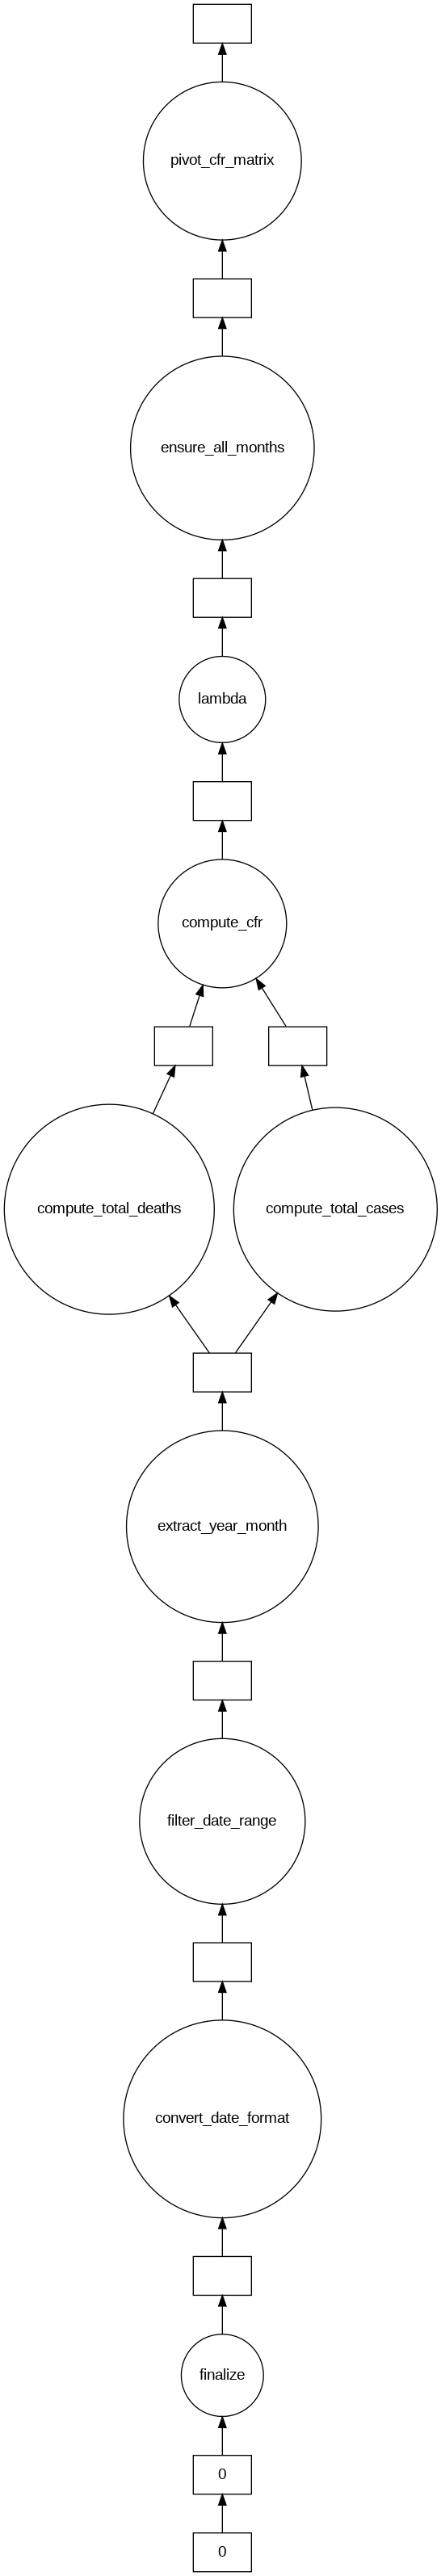

In [94]:
#Visualizing the task graph
cfr_matrix_delayed.visualize(filename="task_graph_full", format="png")



Triggers the execution of all delayed computations in cfr_matrix_delayed. The time taken by it is also calculated using the magic %%timeit

In [95]:
#%%timeit
# Compute the function
cfr_matrix = compute(cfr_matrix_delayed)[0]


230 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Printing the result from the funtion for the 55*14 months. For the states where there are no values it is shoeing 0.0 in the Matrix.

In [96]:
# Print computed CFR matrix
print(cfr_matrix)

year_month                    2020-01   2020-02   2020-03    2020-04  \
state                                                                  
Alabama                           0.0  0.000000  0.532313   2.830899   
Alaska                            0.0  0.000000  0.335008   2.314519   
American Samoa                    0.0  0.000000  0.000000   0.000000   
Arizona                           0.0  0.000000  0.000000   1.486545   
Arkansas                          0.0  0.000000  0.915656   1.911450   
California                        0.0  0.000000  2.006735   3.479974   
Colorado                          0.0  0.000000  0.939250   2.636616   
Connecticut                       0.0  0.000000  1.814771   6.477626   
Delaware                          0.0  0.000000  1.334107   2.734038   
Florida                           0.0  0.000000  0.842669   2.905738   
Georgia                           0.0  0.000000  2.185574   3.980977   
Guam                              0.0  0.000000  2.702703   3.61

Parallelized execution makes sense if the dataset is large and involves expensive computations like filtering, grouping, and sorting. Since all these operations are performed so Parallelising them using dask delayed will be usefil.The use of Dask Distributed further improves performance by spreading computations across multiple workers. I have also installed distributed to reduce the computaion time. Moreover, I have checked using distributed but removing the dask delay the time taken is more. Hence, Parallelising has reduced the time that we can see in the task graph since they are executed in parallel.

**4) Using this matrix as input, compute the ranking of states, on how the CFR rate changed over time.**

This code ranks U.S. states based on month-to-month changes in Case Fatality Rate (CFR) using Dask Delayed for efficient computation. It first calculates monthly CFR changes using .diff(axis=1), which computes the difference between consecutive months. Then, it sums the CFR changes for each state across the first seven months, since the data is not present for the next 7 months, it has been verified by calling the diff in a separate code block, providing a measure of CFR volatility. Finally, it ranks states in descending order based on total CFR fluctuations. The result is a sorted DataFrame with total CFR change and rank for each state. The computation runs in parallel using Dask and returns the ranked DataFrame.

In [98]:
import dask.dataframe as dd
from dask import delayed, compute
import pandas as pd

@delayed
def compute_monthly_cfr_changes(cfr_matrix):
    """
    Computes month-to-month CFR changes for each state.
    """
    return cfr_matrix.diff(axis=1)  # Computes month-to-month differences

@delayed
def compute_total_cfr_change(cfr_changes):
    """
    Computes the total CFR change per state by summing  month-to-month differences.
    """
    return cfr_changes.iloc[:, :7].sum(axis=1)  # Sum changes across months per state

@delayed
def rank_states_by_cfr_change(total_cfr_change):
    """
    Ranks states based on their CFR volatility over time.
    """
    cfr_ranking_df = total_cfr_change.to_frame(name="Total CFR Change")
    cfr_ranking_df['Rank'] = cfr_ranking_df['Total CFR Change'].rank(ascending=False, method="dense")
    return cfr_ranking_df.sort_values(by="Rank")

def compute_cfr_change_ranking(cfr_matrix , visualize=True):
    """
    Computes state rankings based on month-to-month changes in CFR using Dask.
    """

    # Computing Month-to-Month CFR Changes
    cfr_changes_delayed = compute_monthly_cfr_changes(cfr_matrix)

    # Computing Total CFR Change Per State
    total_cfr_change_delayed = compute_total_cfr_change(cfr_changes_delayed)

    # Rank States Based on CFR Change
    ranked_states_delayed = rank_states_by_cfr_change(total_cfr_change_delayed)

    # Compute results in parallel
    ranked_states = compute(ranked_states_delayed)[0]

    return ranked_states


In [99]:
compute_cfr_change_ranking(cfr_matrix)


,Total CFR Change,Rank
state,,
Connecticut,9.500807,1.0
Michigan,8.623360,2.0
New Jersey,8.251406,3.0
Massachusetts,7.437951,4.0
Pennsylvania,7.418973,5.0
New York,7.233961,6.0
Northern Mariana Islands,6.535948,7.0
New Hampshire,6.436738,8.0
United States Virgin Islands,5.976096,9.0


Dask partitions the dataset, allowing parallel processing across states.
.Dask parallelizes these computations across multiple CPU cores.Since computing CFR changes and total CFR change are independent, Dask schedules them concurrently.

The above blocks of code and the functions created could be analysed further that is deeply in order to check different variations for reducing the computaion time. According to me, setting the distributed along with the dak delay has reduced the time, but again further analysis could be performed.